In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from os import getcwd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

In [3]:
f"{getcwd()}"

'C:\\Users\\Amartya057\\Desktop\\Coursera DL Specialization\\CNN with tf\\Week3'

In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [5]:
local_weights=f"{getcwd()}\\inception_v3_weights.h5"
pre_trained_model=InceptionV3(input_shape=(150,150,3),
                             weights=None,
                             include_top=False)
pre_trained_model.load_weights(local_weights)

for layer in pre_trained_model.layers:
    layer.trainable=False
    
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [6]:
last_layer=pre_trained_model.get_layer("mixed7")
last_output=last_layer.output

In [14]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy")>0.90):
            print("\n 90% accuracy reached, stopping training")
            self.model.stop_training=True

In [8]:
x=layers.Flatten()(last_output)
x=layers.Dense(units=1024, activation="relu")(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(units=1, activation="sigmoid")(x)

model=Model(pre_trained_model.input,x)

model.compile(optimizer=RMSprop(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])

model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                shear_range=0.2,
                                zoom_range=0.2,
                                height_shift_range=0.2,
                                width_shift_range=0.2,
                                horizontal_flip=True,
                                fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory("dataset\\training",
                                                 target_size=(150,150),
                                                 batch_size=32,
                                                 class_mode="binary")
test_generator=test_datagen.flow_from_directory("dataset\\testing",
                                               target_size=(150,150),
                                               batch_size=10,
                                               class_mode="binary")

Found 8998 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


In [15]:
callbacks=myCallback()
history = model.fit(
            train_generator,
            validation_data = test_generator,
            epochs = 15,
            verbose = 1,
            callbacks=[callbacks]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 282 steps, validate for 101 steps
Epoch 1/15
282/282 [==============================] - 61s 217ms/step - loss: 0.3160 - accuracy: 0.8645 - val_loss: 0.6503 - val_accuracy: 0.9142
Epoch 2/15
282/282 [==============================] - 60s 214ms/step - loss: 0.3064 - accuracy: 0.8753 - val_loss: 0.3565 - val_accuracy: 0.9501
Epoch 3/15
282/282 [==============================] - 60s 213ms/step - loss: 0.2889 - accuracy: 0.8806 - val_loss: 0.4263 - val_accuracy: 0.9461
Epoch 4/15
282/282 [==============================] - 61s 215ms/step - loss: 0.2844 - accuracy: 0.8816 - val_loss: 0.5925 - val_accuracy: 0.9301
Epoch 5/15
282/282 [==============================] - 61s 216ms/step - loss: 0.2792 - accuracy: 0.8834 - val_loss: 0.3907 - val_accuracy: 0.9501
Epoch 6/15
282/282 [==============================] - 61s 216ms/step - loss: 0.2650 - accuracy: 0.8908 - val_loss: 1.9379 - val_accuracy: 0.8144
Epoch 7/15
282/282 [================

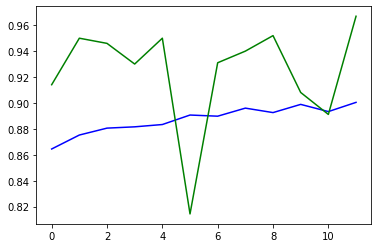

In [19]:
accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, color="b")
plt.plot(epochs,val_accuracy,color="g")
plt.show()